## Exploring the Dataset

Im about to start looking for a new apartment and thought that this project would give me a good idea on the rent market in Berlin since i haven't moved in over 6 years and not familiar anymore with the current situation

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
plt.style.use('seaborn')

%matplotlib inline

from datetime import datetime
from datetime import timedelta
from datetime import date

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px
import chart_studio.plotly as py

pd.set_option('display.max_columns', None)

## Loading the data

In [2]:
# Import cleaned data
df = pd.read_csv('Data/immo_berlin.csv')
df.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,scoutId,firingTypes,hasKitchen,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,streetPlain,lift,typeOfFlat,geo_plz,noRooms,floor,numberOfFloors,garden,regio2,regio3,description,date,buildingAge,schufa_yn,PersonalInfo_yn,incomeProof_yn,guarantee_yn,debtFreeProof_yn,ID_yn,utilitiesPrice
0,Berlin,320.00,central_heating,0,1,1140.00,115671495,NaN,1,0,820,77.00,NaN,NaN,negotiable,Metropolitan_Park,1,ground_floor,13591,3.0,0.0,3.0,0,Berlin,Staaken_Spandau,Diese attraktive EG-Wohnung kann ab sofort bez...,Feb20,NaN,0,0,0,0,0,0,320.00
1,Berlin,79.00,central_heating,0,0,955.00,113359456,gas,0,0,808,62.63,refurbished,NaN,negotiable,Börnestraße,0,ground_floor,13086,2.0,0.0,3.0,0,Berlin,Weißensee_Weißensee,Suchen Sie eine 2-Zimmerwohnung in Weißensee? ...,Oct19,102.0,0,0,0,0,0,0,147.00
2,Berlin,150.00,floor_heating,1,1,1300.00,113704695,district_heating,1,1,1150,46.40,first_time_use,luxury,no,Stallschreiberstraße,1,apartment,10179,2.0,3.0,5.0,0,Berlin,Mitte_Mitte,Dieses luxuriöse Neubauquartier direkt am Luis...,Oct19,1.0,0,0,0,0,0,0,150.00
3,Berlin,228.78,floor_heating,0,1,1428.78,107589685,district_heating,1,1,1200,67.00,mint_condition,sophisticated,negotiable,Hallesche_Straße,1,apartment,10963,2.5,6.0,7.0,0,Berlin,Kreuzberg_Kreuzberg,Bei dieser ansprechenden Immobilie handelt es ...,Oct19,3.0,0,0,0,0,0,1,228.78
4,Berlin,147.08,district_heating,1,1,1559.05,114773727,district_heating,1,1,1338,73.54,first_time_use,sophisticated,negotiable,Heidestraße,1,ground_floor,10557,2.0,0.0,6.0,0,Berlin,Tiergarten_Tiergarten,"In the """"Wasserstadt - Mitte"""" you can expect ...",Feb20,1.0,0,0,0,0,0,0,221.05


## Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   regio1            10652 non-null  object 
 1   serviceCharge     10458 non-null  float64
 2   heatingType       9188 non-null   object 
 3   newlyConst        10652 non-null  int64  
 4   balcony           10652 non-null  int64  
 5   totalRent         10652 non-null  float64
 6   scoutId           10652 non-null  int64  
 7   firingTypes       8510 non-null   object 
 8   hasKitchen        10652 non-null  int64  
 9   cellar            10652 non-null  int64  
 10  baseRent          10652 non-null  int64  
 11  livingSpace       10652 non-null  float64
 12  condition         8542 non-null   object 
 13  interiorQual      6923 non-null   object 
 14  petsAllowed       6336 non-null   object 
 15  streetPlain       9326 non-null   object 
 16  lift              10652 non-null  int64 

In [4]:
df.describe(include = 'all')

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,scoutId,firingTypes,hasKitchen,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,streetPlain,lift,typeOfFlat,geo_plz,noRooms,floor,numberOfFloors,garden,regio2,regio3,description,date,buildingAge,schufa_yn,PersonalInfo_yn,incomeProof_yn,guarantee_yn,debtFreeProof_yn,ID_yn,utilitiesPrice
count,10652,10458.000000,9188,10652.000000,10652.000000,10652.000000,1.065200e+04,8510,10652.000000,10652.000000,10652.000000,10652.000000,8542,6923,6336,9326,10652.000000,9979,10652.000000,10652.000000,9599.000000,7538.000000,10652.000000,10652,10652,10085,10652,9193.000000,10652.000000,10652.000000,10652.000000,10652.000000,10652.000000,10652.000000,10652.000000
unique,1,NaN,14,NaN,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,10,5,4,3334,NaN,9,NaN,NaN,NaN,NaN,NaN,1,79,7764,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Berlin,NaN,central_heating,NaN,NaN,NaN,NaN,district_heating,NaN,NaN,NaN,NaN,first_time_use,sophisticated,negotiable,Heidestraße,NaN,apartment,NaN,NaN,NaN,NaN,NaN,Berlin,Tiergarten_Tiergarten,Wichtig: Bitte lassen Sie uns eine Kontaktanfr...,May19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10652,NaN,4248,NaN,NaN,NaN,NaN,3972,NaN,NaN,NaN,NaN,1911,3764,4276,204,NaN,7062,NaN,NaN,NaN,NaN,NaN,10652,850,87,2613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,197.816905,NaN,0.167105,0.732163,1384.275551,1.097214e+08,NaN,0.600075,0.544123,1146.163913,80.492860,NaN,NaN,NaN,NaN,0.498686,NaN,11931.796376,2.534294,2.855922,4.871982,0.137908,NaN,NaN,NaN,NaN,52.527575,0.025535,0.011735,0.021029,0.002065,0.010984,0.050319,238.111638
std,NaN,151.518612,NaN,0.373087,0.442853,1080.842440,9.893702e+06,NaN,0.489906,0.498073,837.298251,43.070159,NaN,NaN,NaN,NaN,0.500022,NaN,1337.591855,1.446827,2.748008,2.315028,0.344820,NaN,NaN,NaN,NaN,49.779885,0.157751,0.107695,0.143487,0.045401,0.104232,0.218613,531.210039
min,NaN,0.000000,NaN,0.000000,0.000000,226.750000,3.037401e+07,NaN,0.000000,0.000000,178.000000,3.000000,NaN,NaN,NaN,NaN,0.000000,NaN,10017.000000,1.000000,-1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,110.065000,NaN,0.000000,0.000000,793.240000,1.073816e+08,NaN,0.000000,0.000000,629.000000,55.000000,NaN,NaN,NaN,NaN,0.000000,NaN,10557.000000,2.000000,1.000000,4.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,148.920000
50%,NaN,165.000000,NaN,0.000000,1.000000,1134.325000,1.121531e+08,NaN,1.000000,1.000000,939.500000,71.260000,NaN,NaN,NaN,NaN,0.000000,NaN,12207.000000,2.000000,2.000000,5.000000,0.000000,NaN,NaN,NaN,NaN,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
75%,NaN,240.000000,NaN,0.000000,1.000000,1693.075000,1.148345e+08,NaN,1.000000,1.000000,1427.000000,95.942500,NaN,NaN,NaN,NaN,1.000000,NaN,13125.000000,3.000000,4.000000,6.000000,0.000000,NaN,NaN,NaN,NaN,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,280.000000


## Removing columns that contain duplicate information or are not very useful

In [5]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'totalRent', 'scoutId', 'firingTypes', 'hasKitchen', 'cellar',
       'baseRent', 'livingSpace', 'condition', 'interiorQual', 'petsAllowed',
       'streetPlain', 'lift', 'typeOfFlat', 'geo_plz', 'noRooms', 'floor',
       'numberOfFloors', 'garden', 'regio2', 'regio3', 'description', 'date',
       'buildingAge', 'schufa_yn', 'PersonalInfo_yn', 'incomeProof_yn',
       'guarantee_yn', 'debtFreeProof_yn', 'ID_yn', 'utilitiesPrice'],
      dtype='object')

In [6]:
vars_remove = ['regio1', 'serviceCharge', 'heatingType',
               'scoutId', 'firingTypes',
               'baseRent', 'petsAllowed',
               'streetPlain', 'floor',
               'numberOfFloors', 'regio2', 'description']
df = df.drop(vars_remove, axis = 1)

In [7]:
# remove incorrect/fake entry
df = df[(df['totalRent'] < 50000) & (df['utilitiesPrice'] < 10000)]

## Checking for missing values

In [8]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
interiorQual,3728,0.350047
condition,2110,0.198122
buildingAge,1458,0.136901
typeOfFlat,673,0.063192
utilitiesPrice,0,0.000000
geo_plz,0,0.000000
balcony,0,0.000000
totalRent,0,0.000000
hasKitchen,0,0.000000
cellar,0,0.000000


In [9]:
df.describe(include = 'all')

,newlyConst,balcony,totalRent,hasKitchen,cellar,livingSpace,condition,interiorQual,lift,typeOfFlat,geo_plz,noRooms,garden,regio3,date,buildingAge,schufa_yn,PersonalInfo_yn,incomeProof_yn,guarantee_yn,debtFreeProof_yn,ID_yn,utilitiesPrice
count,10650.000000,10650.000000,10650.000000,10650.000000,10650.000000,10650.000000,8540,6922,10650.000000,9977,10650.000000,10650.000000,10650.000000,10650,10650,9192.000000,10650.000000,10650.000000,10650.000000,10650.000000,10650.000000,10650.000000,10650.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,10,5,NaN,9,NaN,NaN,NaN,79,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,first_time_use,sophisticated,NaN,apartment,NaN,NaN,NaN,Tiergarten_Tiergarten,May19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1910,3763,NaN,7061,NaN,NaN,NaN,849,2611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.167042,0.732207,1378.425650,0.600188,0.544225,80.497413,NaN,NaN,0.498779,NaN,11931.792019,2.534488,0.137934,NaN,NaN,52.533072,0.025540,0.011737,0.021033,0.002066,0.010986,0.050329,232.185180
std,0.373031,0.442830,958.180553,0.489883,0.498064,43.071733,NaN,NaN,0.500022,NaN,1337.579429,1.446878,0.344847,NaN,NaN,49.779802,0.157766,0.107705,0.143501,0.045405,0.104241,0.218632,157.669601
min,0.000000,0.000000,226.750000,0.000000,0.000000,3.000000,NaN,NaN,0.000000,NaN,10017.000000,1.000000,0.000000,NaN,NaN,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,793.160000,0.000000,0.000000,55.000000,NaN,NaN,0.000000,NaN,10557.000000,2.000000,0.000000,NaN,NaN,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,148.840000
50%,0.000000,1.000000,1134.050000,1.000000,1.000000,71.260000,NaN,NaN,0.000000,NaN,12207.000000,2.000000,0.000000,NaN,NaN,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
75%,0.000000,1.000000,1692.442500,1.000000,1.000000,95.947500,NaN,NaN,1.000000,NaN,13125.000000,3.000000,0.000000,NaN,NaN,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,280.000000


Only 4 variables have missing values. since they contain information the could be interesting for our EDA, i will leave the columns in for now. 

## Visulazing the data

Here i will start ploting the data in order to get a clear picture of the rental offers available in Berlin.
First, i will look at the most important features separately

## Total rent 


In [10]:
# distribution of total rent

fig = px.histogram(df, x="totalRent",
                   nbins = 700,
                   title='Histogram of rent price',
                   labels={'totalRent':'Rent (warm) [€]'},
                  histnorm='probability density',
                  )
fig.show()

The rental price distribution is positively skewed, which means that the median is smaller than the mean and that most outliers are larger than the mean. Normalization may be required before ML algorithms are implemented.

Outliers are also a problem. Although there are luxury apartments in Berlin that cost more than 10k a month to rent, they are very few and do not represent the rental market. also, extreme outliers will cause problems later on when i apply prediction models

## Dealing with outliers

In [11]:
#remove 1% of observtions from totaRent
q = df['totalRent'].quantile(0.99)
data_1 = df[df['totalRent']< q]
data_1.describe(include = 'all')

,newlyConst,balcony,totalRent,hasKitchen,cellar,livingSpace,condition,interiorQual,lift,typeOfFlat,geo_plz,noRooms,garden,regio3,date,buildingAge,schufa_yn,PersonalInfo_yn,incomeProof_yn,guarantee_yn,debtFreeProof_yn,ID_yn,utilitiesPrice
count,10542.000000,10542.000000,10542.000000,10542.000000,10542.000000,10542.000000,8452,6846,10542.000000,9875,10542.000000,10542.000000,10542.000000,10542,10542,9093.000000,10542.000000,10542.000000,10542.000000,10542.000000,10542.000000,10542.000000,10542.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,10,5,NaN,9,NaN,NaN,NaN,79,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,first_time_use,sophisticated,NaN,apartment,NaN,NaN,NaN,Tiergarten_Tiergarten,May19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1894,3745,NaN,7013,NaN,NaN,NaN,841,2579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.167900,0.730601,1323.148112,0.596756,0.542402,78.606911,NaN,NaN,0.495447,NaN,11939.571523,2.506763,0.136596,NaN,NaN,52.597932,0.025612,0.011857,0.021059,0.002087,0.010909,0.050560,224.705692
std,0.373795,0.443668,739.625587,0.490572,0.498222,37.942139,NaN,NaN,0.500003,NaN,1333.459970,1.413690,0.343437,NaN,NaN,49.763057,0.157982,0.108249,0.143587,0.045637,0.103879,0.219107,124.971597
min,0.000000,0.000000,226.750000,0.000000,0.000000,3.000000,NaN,NaN,0.000000,NaN,10017.000000,1.000000,0.000000,NaN,NaN,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,790.000000,0.000000,0.000000,54.892500,NaN,NaN,0.000000,NaN,10557.000000,2.000000,0.000000,NaN,NaN,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,148.000000
50%,0.000000,1.000000,1124.000000,1.000000,1.000000,71.000000,NaN,NaN,0.000000,NaN,12209.000000,2.000000,0.000000,NaN,NaN,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
75%,0.000000,1.000000,1669.045000,1.000000,1.000000,95.000000,NaN,NaN,1.000000,NaN,13125.000000,3.000000,0.000000,NaN,NaN,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,278.000000


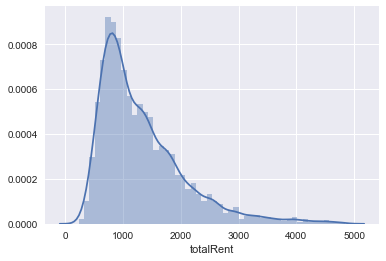

In [12]:
sns.distplot(data_1['totalRent'])

## UtilitiesPrice

In [13]:
# distribution of utilitie cost

fig = px.histogram(data_1, x="utilitiesPrice",
                   title='Histogram of utilitie cost',
                   labels={'utilitiesPrice':'utilitie cost[€]'},
                  histnorm='probability density',
                  )
fig.show()

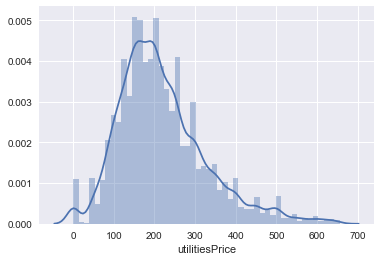

In [14]:
#remove 1% of observtions from utilitiesPrice
q = data_1['utilitiesPrice'].quantile(0.99)
data_2 = data_1[data_1['utilitiesPrice']< q]
sns.distplot(data_2['utilitiesPrice'])

## living Space

In [15]:
# distribution of livingSpace

fig = px.histogram(data_2, x="livingSpace",
                   nbins = 800,
                   title='Histogram of living space',
                  histnorm='probability density',
                  )
fig.show()

 ## Building age

In [16]:
# distribution of building Age

fig = px.histogram(data_2, x="buildingAge",
                   nbins = 100,
                   title='Histogram of building Age'
                   ,
                  histnorm='probability density',
                  )
fig.show()

The oldest residential building in Berlin dates back to the 17th century so any bulding older than 420 years is likley a false entry and should be removed. 

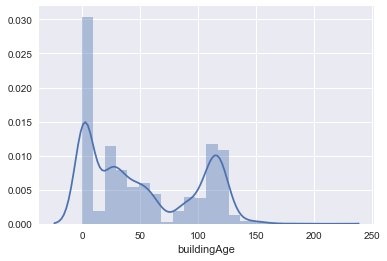

In [17]:
data_3 = data_2[(data_2['buildingAge'] < 400) &
               (data_2['buildingAge'] >= 0)]
sns.distplot(data_3['buildingAge'])

Also to avoid problems later on, i will replace all buildings that are 0 years old (built in 2020) to be 1 year old

In [18]:
data_3['buildingAge'] = data_3['buildingAge'].apply(lambda x: 1 if x == 0 else x)

## Number of rooms

In [19]:
# distribution of noRooms

fig = px.histogram(data_3, x="noRooms",
                   nbins = 100,
                   title='Histogram of noRooms',
                  histnorm='probability density',
                  )
fig.show()

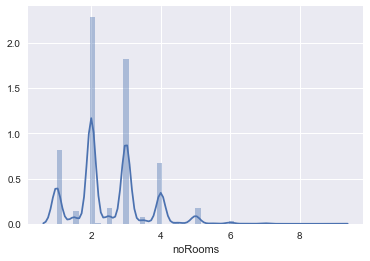

In [20]:
data_4 = data_3[(data_3['noRooms'] < 50) & 
               (data_3['noRooms'] > 0)]
sns.distplot(data_4['noRooms'])

In [21]:
# Create datframe called 'df_cleaned'
df_cleaned = data_4.reset_index(drop = True)

In [22]:
df_cleaned.describe(include = 'all')

,newlyConst,balcony,totalRent,hasKitchen,cellar,livingSpace,condition,interiorQual,lift,typeOfFlat,geo_plz,noRooms,garden,regio3,date,buildingAge,schufa_yn,PersonalInfo_yn,incomeProof_yn,guarantee_yn,debtFreeProof_yn,ID_yn,utilitiesPrice
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,7373,5862,8995.000000,8510,8995.000000,8995.000000,8995.000000,8995,8995,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,10,5,NaN,9,NaN,NaN,NaN,79,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,first_time_use,sophisticated,NaN,apartment,NaN,NaN,NaN,Tiergarten_Tiergarten,May19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1654,3123,NaN,6095,NaN,NaN,NaN,659,2236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.196109,0.738188,1310.393780,0.566537,0.544302,78.951124,NaN,NaN,0.505503,NaN,11975.680378,2.527326,0.137521,NaN,NaN,52.411451,0.022679,0.010561,0.018566,0.001890,0.008116,0.049694,223.193891
std,0.397074,0.439645,715.328152,0.495581,0.498061,35.322463,NaN,NaN,0.499998,NaN,1324.408669,1.027956,0.344416,NaN,NaN,46.369268,0.148887,0.102230,0.134993,0.043435,0.089725,0.217325,106.684352
min,0.000000,0.000000,226.750000,0.000000,0.000000,8.650000,NaN,NaN,0.000000,NaN,10017.000000,1.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,790.000000,0.000000,0.000000,56.000000,NaN,NaN,0.000000,NaN,10557.000000,2.000000,0.000000,NaN,NaN,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000
50%,0.000000,1.000000,1117.880000,1.000000,1.000000,71.500000,NaN,NaN,1.000000,NaN,12277.000000,2.000000,0.000000,NaN,NaN,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.510000
75%,0.000000,1.000000,1661.730000,1.000000,1.000000,95.000000,NaN,NaN,1.000000,NaN,13127.000000,3.000000,0.000000,NaN,NaN,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.200000


In [23]:
# check the dates 
df_cleaned['date'].unique()

array(['Oct19', 'Feb20', 'May19', 'Sep18', 'Apr20'], dtype=object)

Since we have entries from 2018 until 2020, it would be interesting to see the rent price trend throughout these years.

In [24]:
dic = {'Feb20':'02-2020', 'Oct19':'10-2019', 'May19':'05-2019', 'Sep18':'09-2018', 'Apr20':'04-2020' }
df_date = df_cleaned[['totalRent','date']]
df_date['date'] = df_date['date'].map(dic)
df_date['date'] = pd.to_datetime(df_date['date'])

In [25]:
## Example time series 

fig = px.line(df_date.groupby(df_date['date']).mean(),
              y="totalRent",
                   title='',
                   labels={'totalRent':'Rent (warm) [€]','date':''}
                  )

fig.update_xaxes(nticks=5,tickangle = 0)
fig.update_yaxes(nticks=5, tickangle = 0)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df_date.groupby(df_date['date']).mean().index,
        ticktext = ['Sep18', 'May19', 'Oct19', 'Feb20', 'Apr20']
    ))

fig.show()

It is difficult to tell why there was a fall in rent prices in oct 2019. This could be a seasonal behavoiur that occurs each year, or a unique occuerence driven by an event. Further data is needed to understand this. 

## Area / location

In [26]:
df_cleaned['regio3']

0         Weißensee_Weißensee
1                 Mitte_Mitte
2         Kreuzberg_Kreuzberg
3       Tiergarten_Tiergarten
4             Grünau_Köpenick
                ...          
8990        Köpenick_Köpenick
8991              Mitte_Mitte
8992              Mitte_Mitte
8993    Tiergarten_Tiergarten
8994              Mitte_Mitte
Name: regio3, Length: 8995, dtype: object

In [27]:
# leave only ditrict name
df_cleaned['regio3'] = df_cleaned['regio3'].apply(lambda x: x.split('_')[1] if (x != 'Prenzlauer_Berg_Prenzlauer_Berg') else 
                                  ' '.join(x.split('_')[-2:]))

In [28]:
df_cleaned['regio3'].unique()

array(['Weißensee', 'Mitte', 'Kreuzberg', 'Tiergarten', 'Köpenick',
       'Marzahn', 'Hohenschönhausen', 'Hellersdorf', 'Prenzlauer Berg',
       'Buchholz', 'Charlottenburg', 'Tempelhof', 'Neukölln',
       'Wilmersdorf', 'Spandau', 'Friedrichshain', 'Reinickendorf',
       'Wedding', 'Treptow', 'Schöneberg', 'Lichtenberg', 'Pankow',
       'Steglitz', 'Zehlendorf'], dtype=object)

In [29]:
# create count plot of areas
import plotly.express as px
fig = px.bar(df_cleaned.groupby(df_cleaned['regio3']).count().sort_values('totalRent'), 
             x=df_cleaned.groupby(df_cleaned['regio3']).count().sort_values('totalRent').index
             , y='totalRent', 
            labels={'totalRent':'Number of listings','x':'Area'})

fig.update_xaxes(tickangle = 45)

fig.show()

In [30]:
df_cleaned.groupby([df_cleaned['regio3'], df_cleaned['geo_plz']]).mean()

newlyConst   balcony    totalRent  hasKitchen  \
regio3         geo_plz                                                  
Buchholz       13127      0.238806  0.865672  1029.564776    0.641791   
Charlottenburg 10585      0.049180  0.786885  1597.409836    0.704918   
               10587      0.230769  0.717949  1354.478205    0.641026   
               10589      0.361111  0.888889  1631.867778    0.722222   
               10623      0.192308  0.807692  2217.913462    0.615385   
...                            ...       ...          ...         ...   
Zehlendorf     14163      0.000000  0.789474  1621.862632    0.684211   
               14165      0.045455  0.727273  1135.761364    0.454545   
               14167      0.000000  0.761905  1094.934286    0.714286   
               14169      0.000000  0.818182  1402.434545    0.363636   
               14195      0.400000  0.575000  1774.215500    0.475000   

                          cellar  livingSpace      lift   noRooms    garden  \
regio3         geo_plz                                                        
Buchholz       13127    0.611940    72.504478  0.447761  2.619403  0.059701   
Charlottenburg 10585    0.573770    90.918525  0.704918  2.655738  0.098361   
               10587    0.589744    76.393333  0.615385  2.307692  0.102564   
               10589    0.416667    92.460833  0.527778  2.750000  0.027778   
               10623    0.384615   118.069231  0.576923  3.134615  0.038462   
...                          ...          ...       ...       ...       ...   
Zehlendorf     14163    0.842105   101.736842  0.157895  2.868421  0.368421   
               14165    0.818182    78.895455  0.090909  2.886364  0.181818   
               14167    0.666667    66.154286  0.333333  2.166667  0.238095   
               14169    0.818182    93.831818  0.272727  3.136364  0.090909   
               14195    0.750000   101.419250  0.600000  2.812500  0.175000   

                        buildingAge  schufa_yn  PersonalInfo_yn  \
regio3         geo_plz                                            
Buchholz       13127      26.313433   0.014925         0.000000   
Charlottenburg 10585      52.491803   0.032787         0.032787   
               10587      56.974359   0.025641         0.025641   
               10589      48.527778   0.000000         0.000000   
               10623      77.730769   0.000000         0.000000   
...                             ...        ...              ...   
Zehlendorf     14163      70.526316   0.052632         0.000000   
               14165      59.363636   0.000000         0.000000   
               14167      46.666667   0.000000         0.000000   
               14169      70.363636   0.000000         0.000000   
               14195      25.225000   0.000000         0.000000   

                        incomeProof_yn  guarantee_yn  debtFreeProof_yn  \
regio3         geo_plz                                                   
Buchholz       13127          0.014925           0.0          0.014925   
Charlottenburg 10585          0.032787           0.0          0.016393   
               10587          0.025641           0.0          0.000000   
               10589          0.000000           0.0          0.000000   
               10623          0.000000           0.0          0.000000   
...                                ...           ...               ...   
Zehlendorf     14163          0.000000           0.0          0.000000   
               14165          0.000000           0.0          0.000000   
               14167          0.000000           0.0          0.000000   
               14169          0.000000           0.0          0.000000   
               14195          0.025000           0.0          0.000000   

                           ID_yn  utilitiesPrice  
regio3         geo_plz                            
Buchholz       13127    0.000000      206.803582  
Charlottenburg 10585    0.065574      267.721311  
       

In [31]:
# dataframe with plz and number of listings
df1 = df_cleaned.groupby(df_cleaned['geo_plz']).count().reset_index()[['geo_plz','totalRent']]

In [32]:
df1.rename(columns={"geo_plz": "plz", "totalRent": "listings"}, inplace= True)
df1['plz'] = df1['plz'].map(str)

In [33]:
plz_shape_df = gpd.read_file('Data/plz-gebiete.shp', dtype={'plz': str})
# Create feature.
plz_shape_df = plz_shape_df \
    .assign(first_dig_plz = lambda x: x['plz'].str.slice(start=0, stop=1))

plz_region_df = pd.read_csv(
    'Data/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)
plz_region_df.drop('osm_id', axis=1, inplace=True)
# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)
germany_df.drop(['note'], axis=1, inplace=True)
berlin_df = germany_df.query('ort == "Berlin"')

In [34]:
berlin_df.head()

,plz,geometry,first_dig_plz,ort,bundesland
14033,14109,"POLYGON ((13.08835 52.41963, 13.09584 52.42198...",1,Berlin,Berlin
14038,14089,"POLYGON ((13.10929 52.45063, 13.10956 52.45108...",1,Berlin,Berlin
14084,13591,"POLYGON ((13.11738 52.51706, 13.11811 52.52010...",1,Berlin,Berlin
14089,13587,"POLYGON ((13.12796 52.58313, 13.12934 52.58593...",1,Berlin,Berlin
14114,13593,"POLYGON ((13.14288 52.52181, 13.14306 52.52179...",1,Berlin,Berlin


In [35]:
df_berlin_map = pd.merge(
    left=berlin_df, 
    right=df1, 
    on='plz',
    how='left'
)

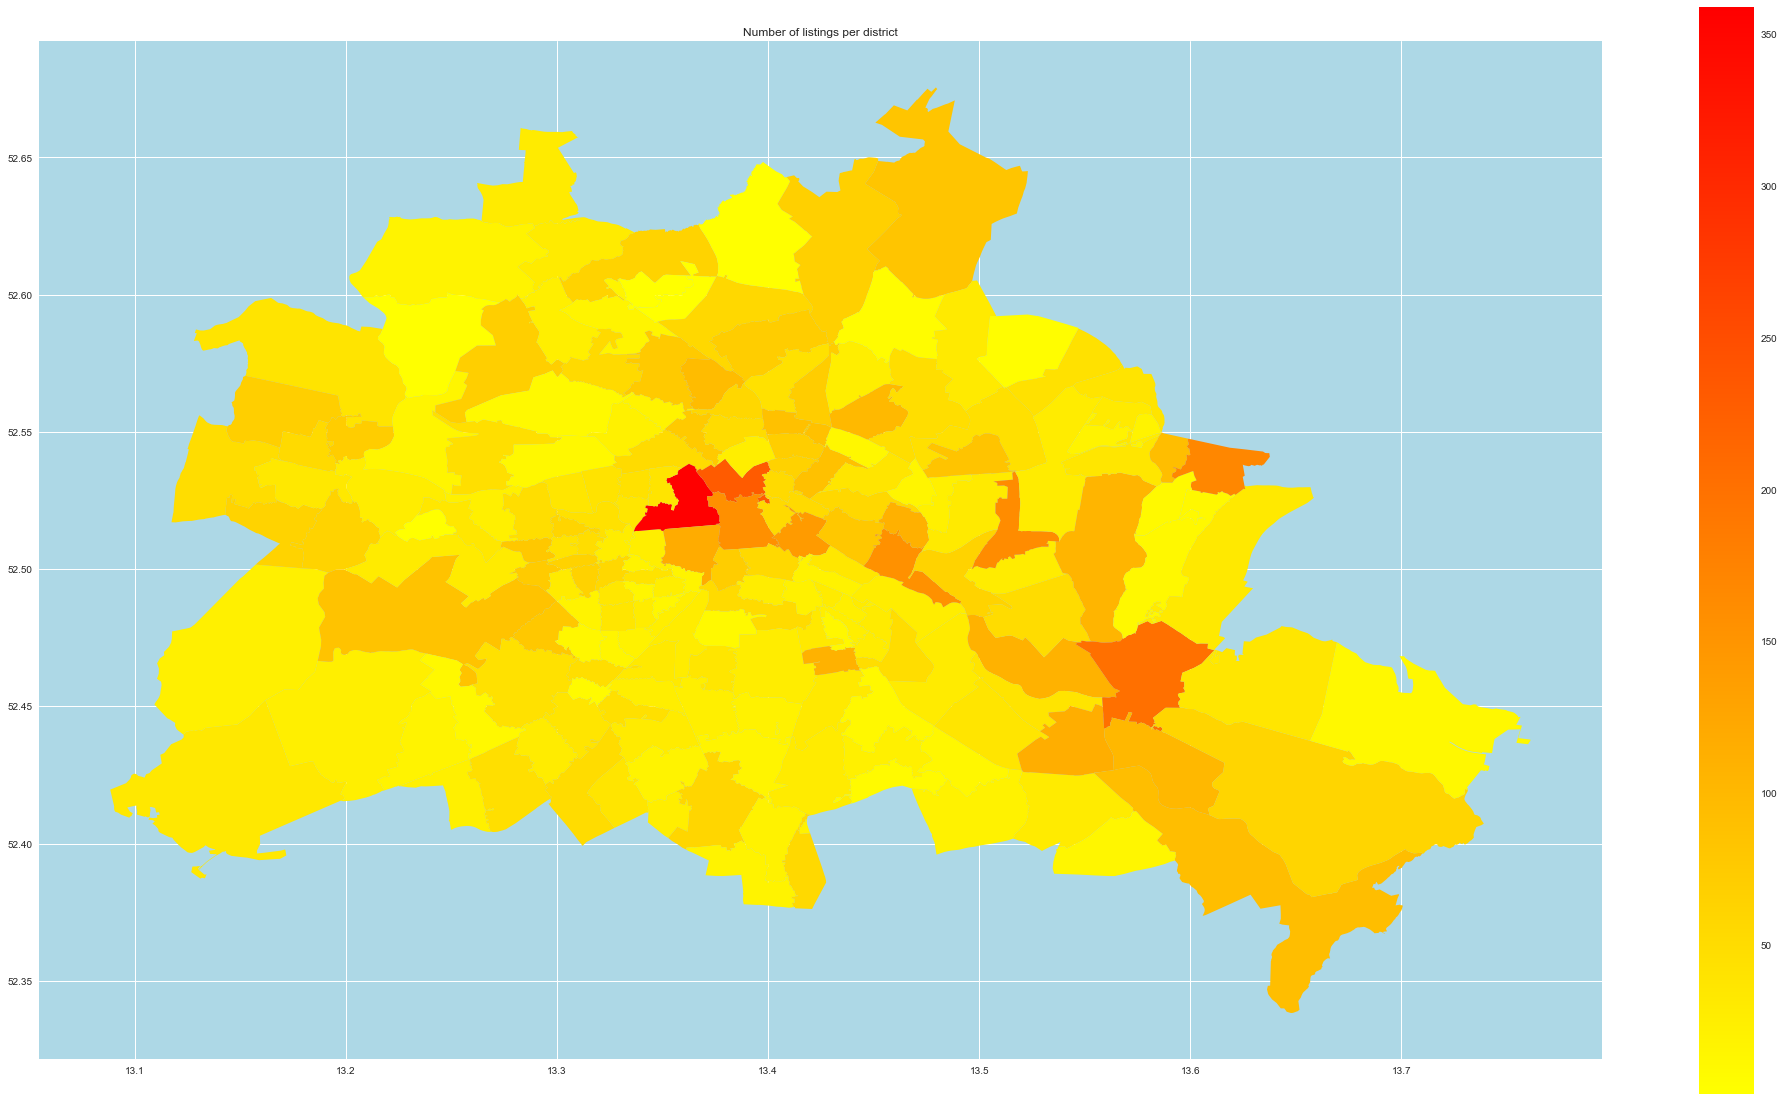

In [36]:
fig, ax = plt.subplots(figsize=(35,20))

df_berlin_map.plot(
    ax=ax, 
    column='listings', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Number of listings per district', 
    aspect=1.3,
    facecolor='lightblue'
);

## Application documents

Here i will create a count plot to see which documents are most frequently asked for when renting in Berlin

In [37]:
df_cleaned.columns

Index(['newlyConst', 'balcony', 'totalRent', 'hasKitchen', 'cellar',
       'livingSpace', 'condition', 'interiorQual', 'lift', 'typeOfFlat',
       'geo_plz', 'noRooms', 'garden', 'regio3', 'date', 'buildingAge',
       'schufa_yn', 'PersonalInfo_yn', 'incomeProof_yn', 'guarantee_yn',
       'debtFreeProof_yn', 'ID_yn', 'utilitiesPrice'],
      dtype='object')

In [38]:
fig = px.bar(df_cleaned[['schufa_yn', 'PersonalInfo_yn', 'incomeProof_yn',
       'guarantee_yn', 'debtFreeProof_yn', 'ID_yn']].sum(), 
            labels={'value':'count','index':''})

fig.update_xaxes(tickangle = 45)

fig.show()

##  Correlation and scatter plots

After examining the most important/popular parameters, i will now have a look at a scatterplot matrix to see which values are correlated with each other. Note here that catagorical values will be excluded.

In [39]:
# Determining corr. coefficent with totalRent and print as list
matrix = df_cleaned.corr()
corr_coef = matrix['totalRent'].sort_values(ascending = False)
print(corr_coef)

totalRent           1.000000
livingSpace         0.838124
utilitiesPrice      0.761701
noRooms             0.662790
hasKitchen          0.331216
lift                0.250425
balcony             0.203407
newlyConst          0.192958
cellar              0.143655
garden              0.116703
ID_yn               0.017228
debtFreeProof_yn    0.011498
PersonalInfo_yn    -0.014977
guarantee_yn       -0.016459
incomeProof_yn     -0.037634
schufa_yn          -0.039773
buildingAge        -0.063780
geo_plz            -0.320707
Name: totalRent, dtype: float64


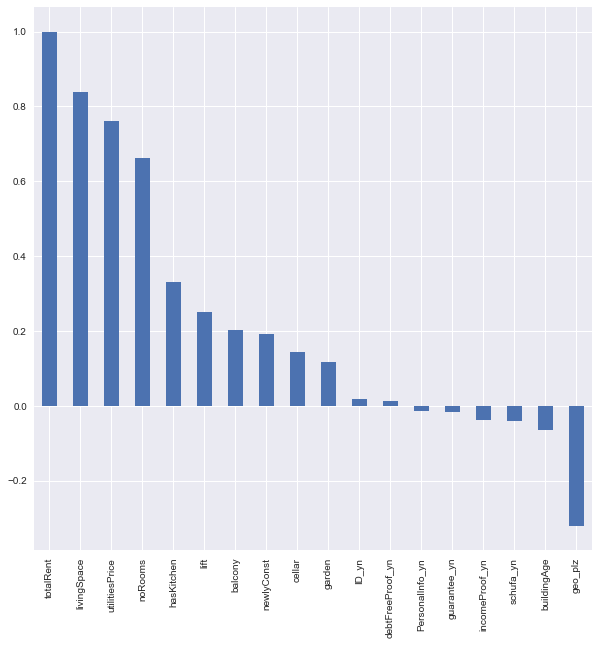

In [40]:
plt.figure(figsize = (10,10))
corr_coef.plot.bar()

It seems that totalRent is correlated with livingSpace, noRooms. I would expect that location is also correlated with rent but i will exxplore that later on. 

<Figure size 720x720 with 0 Axes>

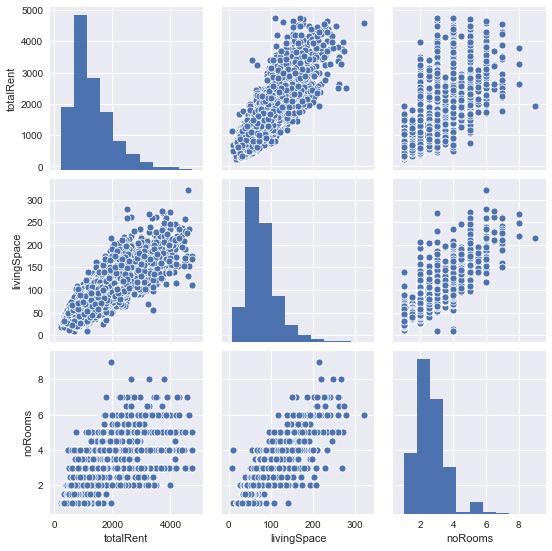

In [41]:
#Scatter 
plt.figure(figsize = (10,10))
sns.pairplot(df_cleaned[['totalRent','livingSpace','noRooms']])

Relationship with catagerocial variables (area, buildingAge, lift, kitchen, interiorQual, garden, etc.. )

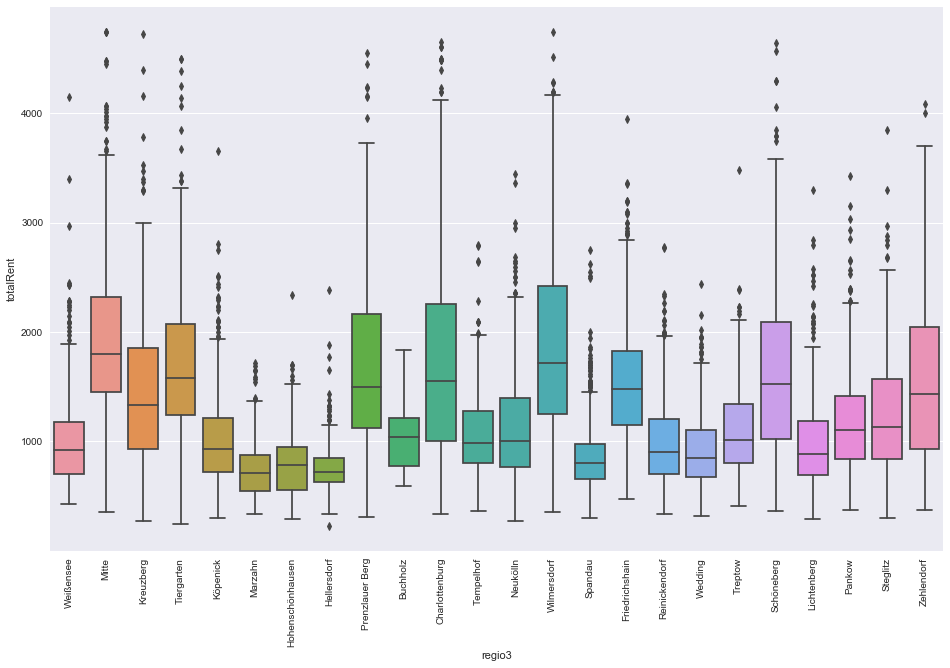

In [42]:
#area
plt.figure(figsize = (16,10))
fig = sns.boxplot(x='regio3', y="totalRent", data=df_cleaned)
plt.xticks(rotation=90);

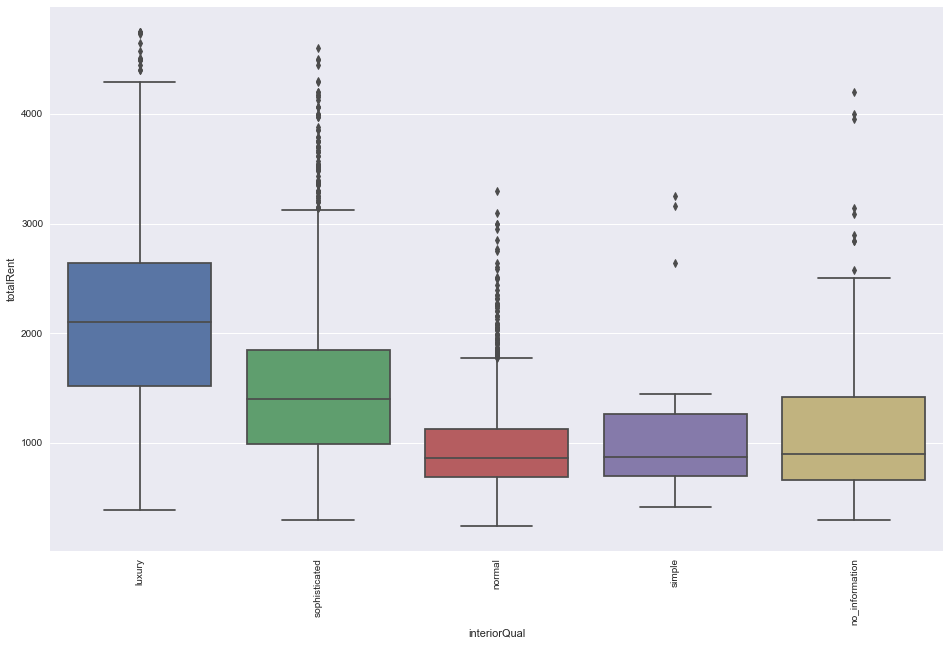

In [43]:
#interiorQual
plt.figure(figsize = (16,10))
fig = sns.boxplot(x='interiorQual', y="totalRent", data=df_cleaned)
plt.xticks(rotation=90);

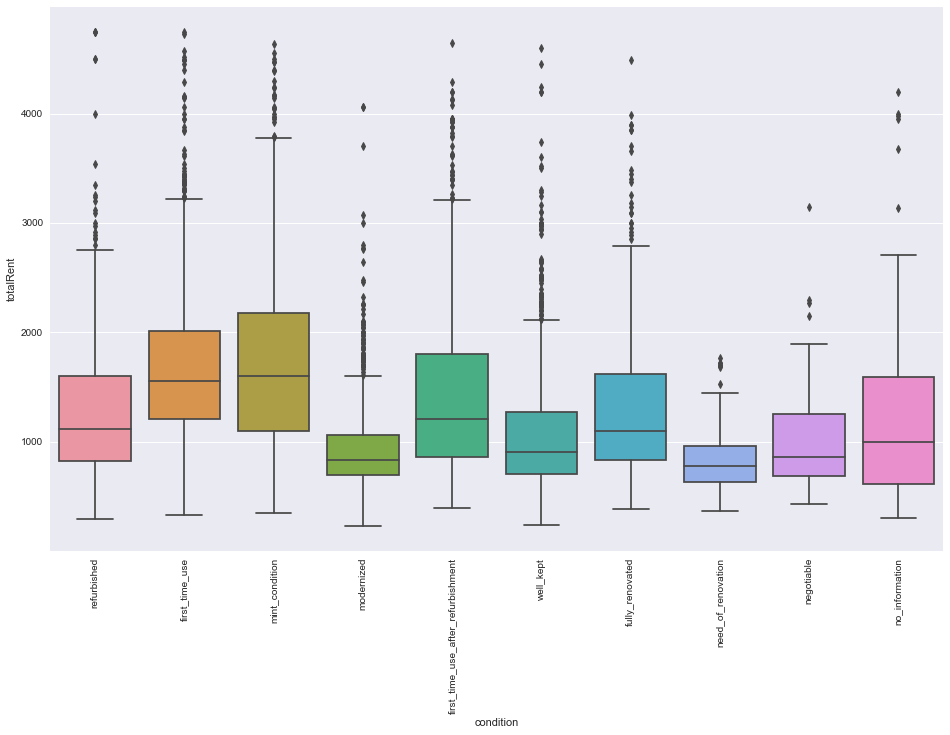

In [44]:
#condition
plt.figure(figsize = (16,10))
fig = sns.boxplot(x='condition', y="totalRent", data=df_cleaned)
plt.xticks(rotation=90);

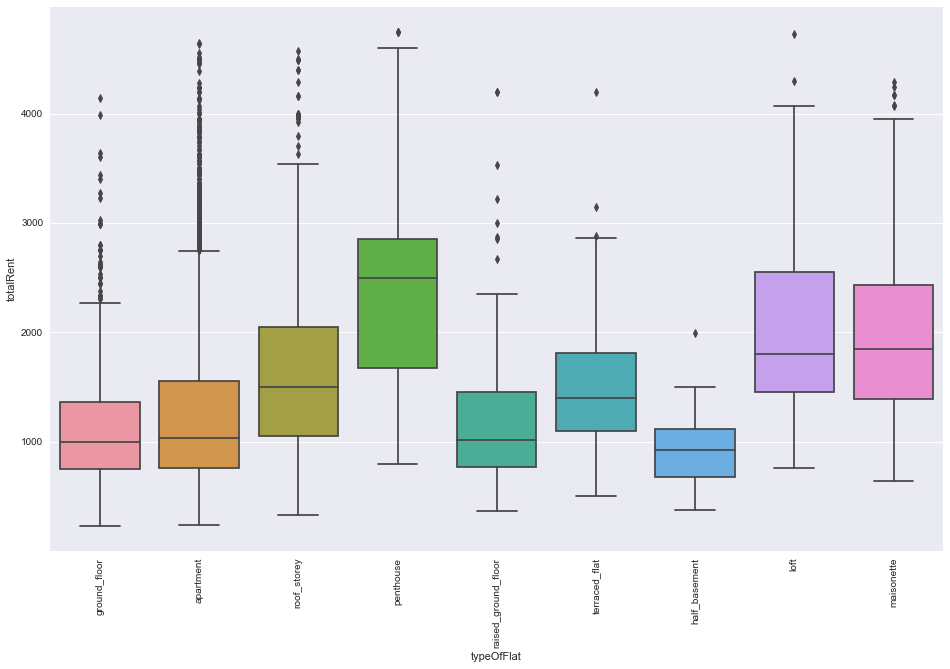

In [45]:
#typeOfFlat
plt.figure(figsize = (16,10))
fig = sns.boxplot(x='typeOfFlat', y="totalRent", data=df_cleaned)
plt.xticks(rotation=90);

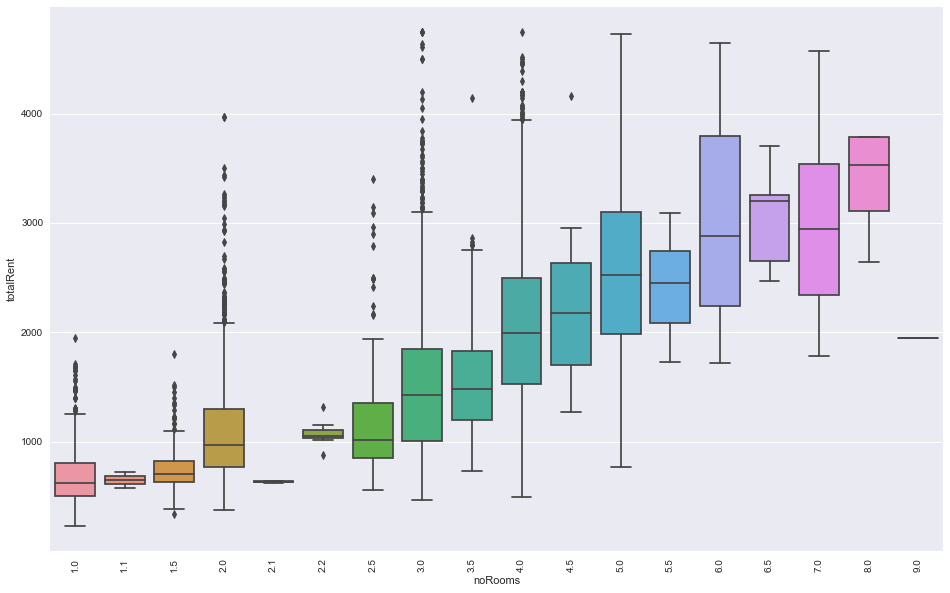

In [46]:
#noRooms
plt.figure(figsize = (16,10))
fig = sns.boxplot(x='noRooms', y="totalRent", data=df_cleaned)
plt.xticks(rotation=90);

Since the 'buildingAage' column has a very large scale i will create a new column where the values are grouped into intervals of 5 years.

In [47]:
df_age = df_cleaned[['buildingAge','totalRent']]
age_intervals = np.arange(0,220, 5)
df_age['age_bins'] = pd.cut(x=df_age['buildingAge'], bins=age_intervals)

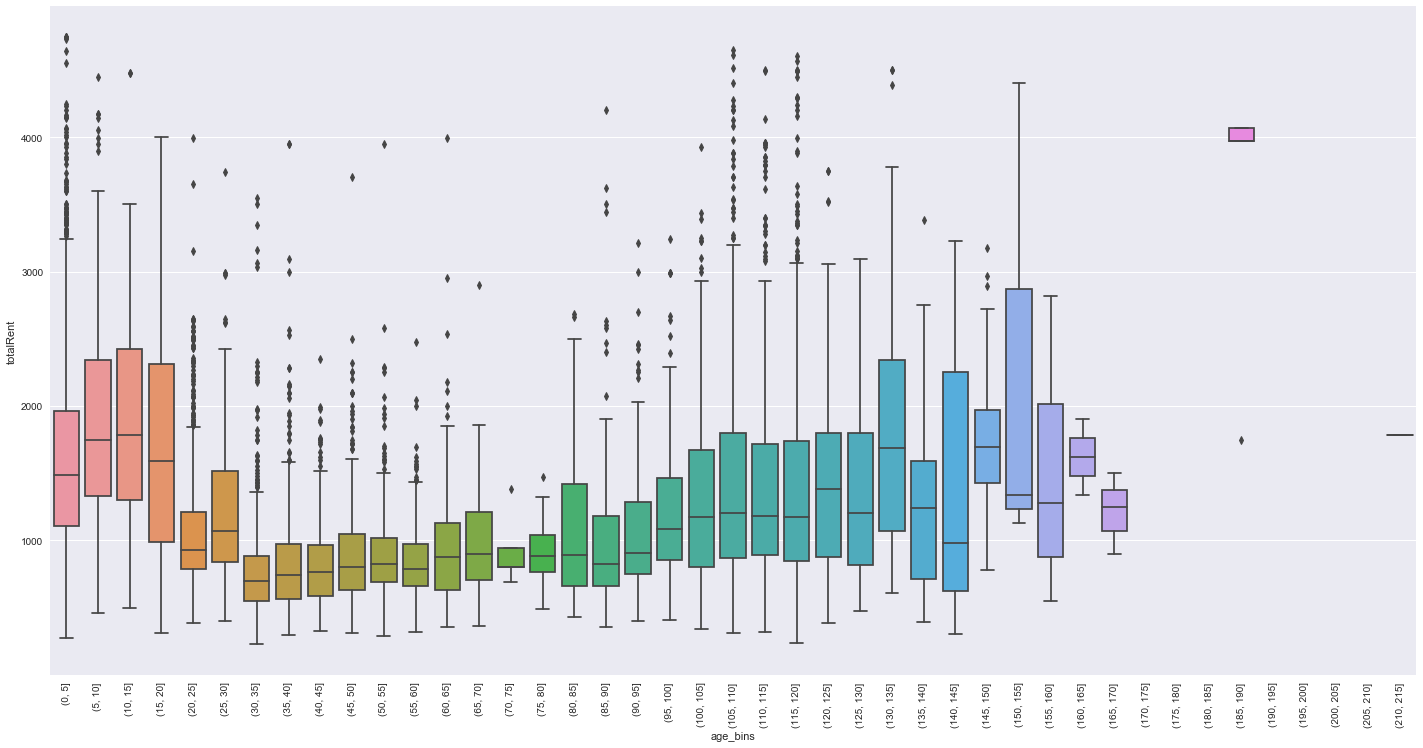

In [48]:
plt.figure(figsize = (20,10))
fig = sns.boxplot(x='age_bins', y="totalRent", data=df_age)
plt.tight_layout()
plt.xticks(rotation=90);

## Deal with missing catagorical values

In [49]:
#missing data
total = df_cleaned.isnull().sum().sort_values(ascending=False)
percent = (df_cleaned.isnull().sum()/df_cleaned.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
interiorQual,3133,0.348305
condition,1622,0.180322
typeOfFlat,485,0.053919


Although interiorQual and condition did have some sort of relationship with totalRent, they have too many missing values that cannot be filled. Therefore i will remove these two columns from the data.

In [50]:
df_cleaned.drop(['interiorQual','condition'], axis = 1, inplace = True)

In [51]:
df_cleaned['typeOfFlat'].value_counts()

apartment              6095
ground_floor            885
roof_storey             796
maisonette              239
raised_ground_floor     171
penthouse               141
terraced_flat           125
loft                     41
half_basement            17
Name: typeOfFlat, dtype: int64

In [52]:
# drop rows where typeOfFlat is Null
df_cleaned = df_cleaned[df_cleaned['typeOfFlat'].isnull() == False]

In [53]:
df_cleaned['typeOfFlat'].isnull().sum()

0

## Export cleaned data

In [54]:
# Export  data
df_cleaned.to_csv(r'Data\df_cleaned.csv', index = False)